In [7]:
import csv
import sys
#sys.path.insert(0, "../runit/")
sys.path.insert(0,"../python/")
from MC_Plots import style
from Sigma_study import energy

import numpy as np



import collections
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot as pp
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from sympy.solvers import solve
from sympy import Symbol
import os
import re
import fnmatch
import pandas as pd
import matplotlib.font_manager


import lmfit

from lmfit import Model

from tempfile import TemporaryFile


In [8]:
ps = style(figure_width = 9,
                 spine_color= 'Black')

In [9]:
en= energy(energy= 1500,edep_max=250)

In [10]:
#calculate the total weight of the ref MC
#only do this the first time you run the notebook
#and after it's not necessary 


# en_ref= energy(energy= en.energy,edep_max=en.edep_max,Type='ref')

# tw=en_ref.total_weight(10000000,famsize=100)
# np.save('twrefMC%i'%en_ref.energy,tw)



## Make Grap of total weight distributions 

Function to make the distributions. Important note that for small simulations (10^4) you sometimes have to relocate the legend

In [12]:
#function
def tenbase_format(x):
    # Nicely format the value of sigma into a cool label
    exponent = np.floor(np.log10(x))
    xstr = r'$10^{%d}$' %exponent
    return xstr

def tenbase_format_tex(x):
    # Nicely format the value of sigma into a cool label
    exponent = np.floor(np.log10(x))
    xstr = '%.1f \\cdot 10^{%d}' % (x / (10**(exponent)), exponent)
    return xstr



def mk_plot(events,nbins,marge):    
    #find how large the families are  
    fam_size_vrt=en.find_fam_size(events,vrt='fiducial_scatter',size_fiducial='Normal ')
    fam_size_nonvrt=en.find_fam_size(events,vrt='None',size_fiducial='Normal ')

    vrt = []
    nonvrt=[]

    #Calculate the total weights    
    tw_vrt = en.total_weight(nevents=events,famsize=fam_size_vrt)
    tw_nonvrt = en.total_weight(events,vrt='None',famsize=fam_size_nonvrt)


    #n_tilde from ref
    ref=np.load('twrefMC%i.npy'%en.energy)
    n_tilde=np.mean(ref[1])*events
    

    #Drawing part of making the plots
    xmin = min(tw_nonvrt[0])-marge
    xmax= max(tw_nonvrt[0])+marge
    
    ps.latexify()
    fig , ax=plt.subplots(1,1,sharex=True)
    #vrt dist
    tw_vrt_histarr=ax.hist(tw_vrt[0],histtype='step',range=(xmin,xmax),
                           bins=nbins,label='VRT',linewidth=1,color='blue')
    
    #non vrt dist
    tw_nonvrt_histarr=ax.hist(tw_nonvrt[0],range=(xmin,xmax),bins=nbins,histtype='step'
                              ,label='Standard MC',color='Red',linestyle='dashed',linewidth=1)
    
    #line of the expected total weight based on ntilde MC
    binsize= (xmax-xmin)/nbins
    ax.plot([n_tilde, n_tilde], [0, max(tw_vrt_histarr[0])*1.3], color='Black', ls='--', lw=2,label='reference MC')
    
    
    leg=ax.legend(loc='upper right',frameon=False,fontsize=22)

    #Calculate the mean and the variance and print them
    mu_vrt=np.mean(tw_vrt[0])
    var_vrt=np.sqrt(np.var(tw_vrt[0]))

    mu_nonvrt=np.mean(tw_nonvrt[0])
    var_nonvrt=np.sqrt(np.var(tw_nonvrt[0]))
    
    f_ntilde=tenbase_format_tex(n_tilde)
    f_mu_vrt=tenbase_format_tex(mu_vrt)
    f_var_vrt=tenbase_format_tex(var_vrt)
    f_mu_nonvrt=tenbase_format_tex(mu_nonvrt)
    f_var_nonvrt=tenbase_format_tex(var_nonvrt)

    text = r'\begin{eqnarray*}' + \
      r'\mu_{BG} &=&'+str(f_ntilde)+ \
      r'\\\bar{x}_{VRT} &=&' +str(f_mu_vrt)+ \
      r'\\\sigma_{VRT} &=&' +str(f_var_vrt)+ \
      r'\\\bar{x}_{MC} &=&' +str(f_mu_nonvrt)+ \
      r'\\\sigma_{MC} &=&' +str(f_var_nonvrt)+ \
      r'\end{eqnarray*}'

    ax.plot([], [], ' ', label=text) # use this for 10^4 plot 
    #ax.text(xmin, 7.5, text, ha='left',va='top',fontsize=22) # use this for the rest 


    ps.reorderLegend(ax,['VRT', 'Standard MC','reference MC', text])
    ax.set_ylim(0,8)# 10 for 10^4 plot 

    ps.format_axes(ax)
    plt.rcParams['legend.fontsize'] = 22

    ax.set_xlabel(r'$N_{BG}$')
    ax.set_ylabel('Counts')
    ax.set_title(r'10 x $N_{\gamma}$='+tenbase_format(events))
    
    plt.savefig(r'total_weigh_'+tenbase_format(events)+'_events'+str(en.energy)+'KeV.pdf')

    plt.show()

    #plt.close()

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


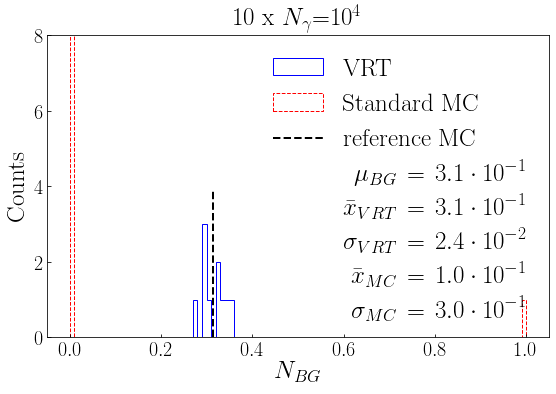

In [13]:
mk_plot(10000,nbins=100,marge=0)


In [ ]:
mk_plot(100000,bins=100,marge=0)
mk_plot(1000000,bins=100,marge=0)
mk_plot(10000000,bins=100,marge=0)